<a href="https://colab.research.google.com/github/jespimentel/estudos_ia/blob/main/01_componentes_principais_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conceitos iniciais

### Aprendizado supervisionado
- Variável dependente (output)

### Aprendizado não supervisionado
- Só os inputs

### Medição estatística envolve:
- Média (no dataframe, a função **colMeans()** retorna o valor médio das colunas)
- Variância (função: **var()**)

**cov()** -> matriz de covariância (associação de variáveis)

**diag(cov(x))** -> variância

variância = 0 -> a variável não tem qualquer influência

**cor(x)** -> correlação (varia de -1 a 1)

# Componentes principais (PCA)

O PCA combina múltiplas variáveis em um conjunto menor de novas variáveis (variáveis latentes), que são combinações lineares ponderadas do conjunto original (redução da dimensionalidade).

O objetivo é que um número limitado de componentes (os componentes principais) explique a maior parte da variância da variável resultante.

Observação: a técnica não deve ser empregada para variávies não correlacionadas.

In [1]:
data(iris)
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [2]:
tail(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
145,6.7,3.3,5.7,2.5,virginica
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica
150,5.9,3.0,5.1,1.8,virginica


In [3]:
pca_Cov <- princomp (iris[,-5], cor=FALSE, scores=TRUE) # Considera a matriz de covariâncias
summary(pca_Cov)

Importance of components:
                          Comp.1     Comp.2     Comp.3      Comp.4
Standard deviation     2.0494032 0.49097143 0.27872586 0.153870700
Proportion of Variance 0.9246187 0.05306648 0.01710261 0.005212184
Cumulative Proportion  0.9246187 0.97768521 0.99478782 1.000000000

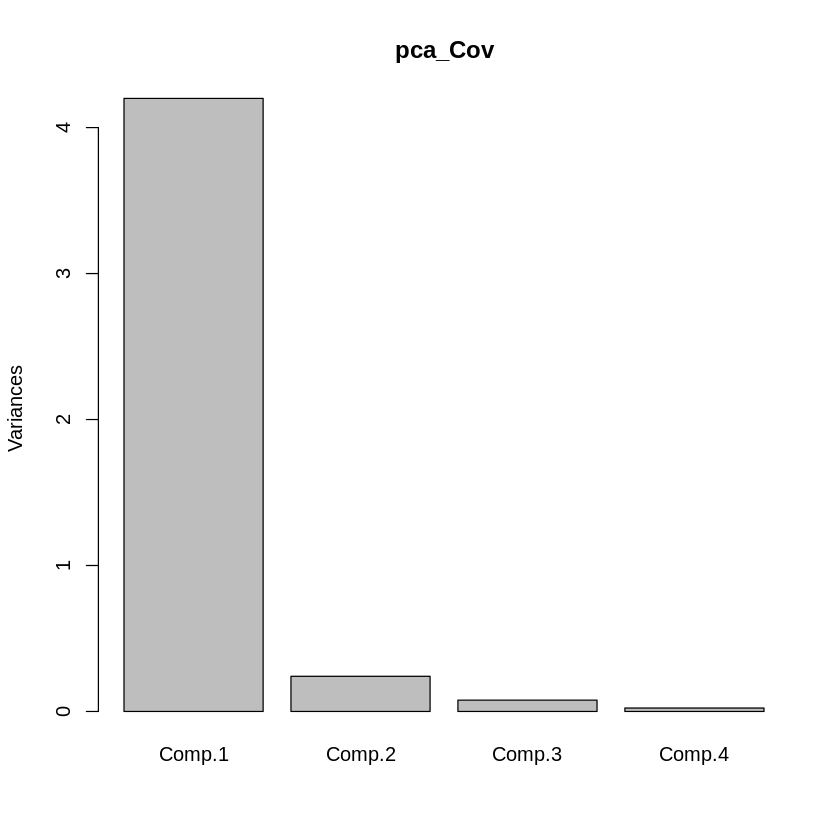

In [4]:
screeplot(pca_Cov)

In [5]:
# Pesos do componente principal
pca_Cov$loadings


Loadings:
             Comp.1 Comp.2 Comp.3 Comp.4
Sepal.Length  0.361  0.657  0.582  0.315
Sepal.Width          0.730 -0.598 -0.320
Petal.Length  0.857 -0.173        -0.480
Petal.Width   0.358        -0.546  0.754

               Comp.1 Comp.2 Comp.3 Comp.4
SS loadings      1.00   1.00   1.00   1.00
Proportion Var   0.25   0.25   0.25   0.25
Cumulative Var   0.25   0.50   0.75   1.00

In [6]:
# Scores
head(pca_Cov$scores)

Comp.1,Comp.2,Comp.3,Comp.4
-2.684126,0.3193972,0.02791483,0.002262437
-2.714142,-0.1770012,0.21046427,0.099026550
-2.888991,-0.1449494,-0.01790026,0.019968390
-2.745343,-0.3182990,-0.03155937,-0.075575817
-2.728717,0.3267545,-0.09007924,-0.061258593
-2.280860,0.7413304,-0.16867766,-0.024200858


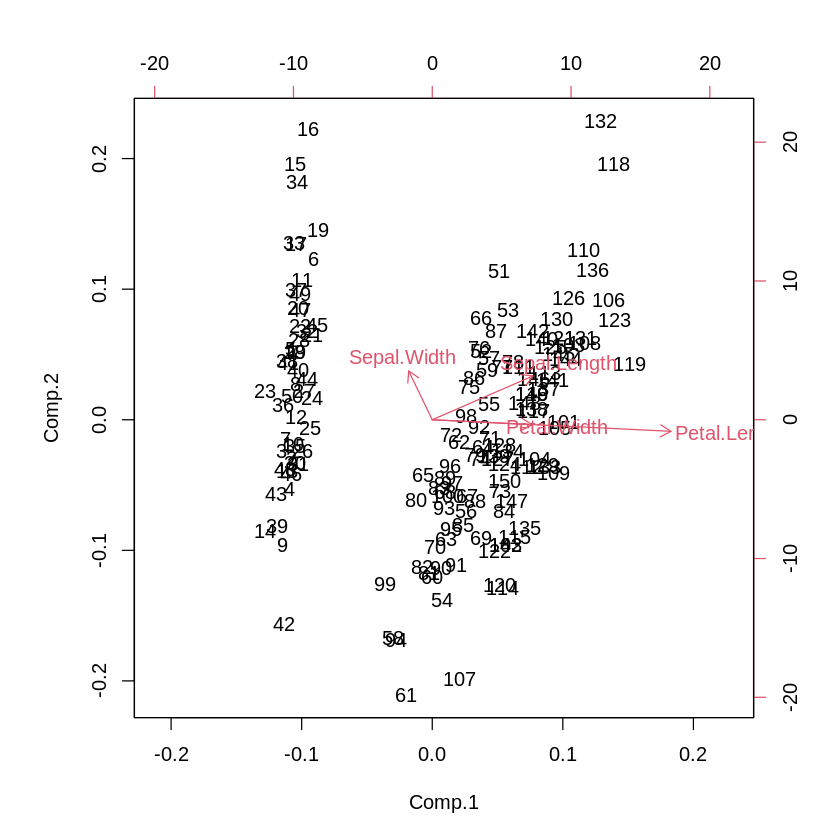

In [7]:
biplot(pca_Cov)

Importance of components:
                          Comp.1    Comp.2     Comp.3      Comp.4
Standard deviation     1.7083611 0.9560494 0.38308860 0.143926497
Proportion of Variance 0.7296245 0.2285076 0.03668922 0.005178709
Cumulative Proportion  0.7296245 0.9581321 0.99482129 1.000000000

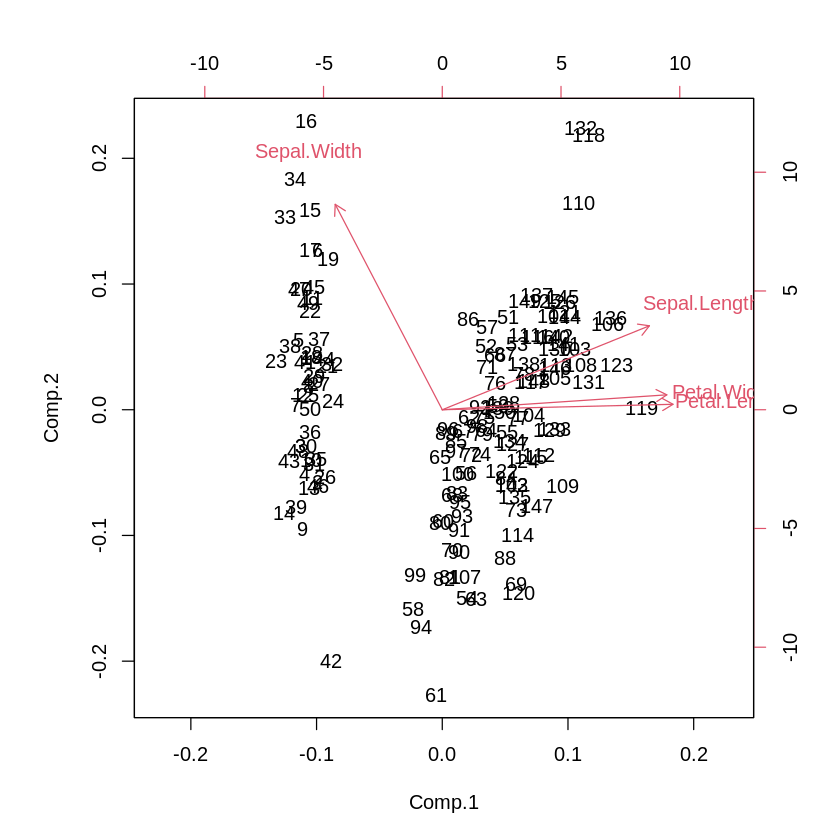

In [8]:
pca_Cov <- princomp (iris[,-5], cor=TRUE, scores=TRUE) # Considera a matriz de correlação
summary(pca_Cov)
biplot(pca_Cov)

In [9]:
variancias <- apply(iris[,-5], 2, var)
variancias

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
   0.6856935    0.1899794    3.1162779    0.5810063

# Exemplo da apostila

In [10]:
x <- 1L:5L  # Atenção aqui
x1 <- c(102, 104, 101, 93, 100)
x2 <- c(96, 87, 62, 68, 77)
df <- data.frame(x, x1, x2)
df

x,x1,x2
<int>,<dbl>,<dbl>
1,102,96
2,104,87
3,101,62
4,93,68
5,100,77


In [11]:
mean(x1)
mean(x2)

# Matriz de covariância amostral
cov(df[-1]) # Obs.: mesmo resultado com var(df[-1])

[1] 100

[1] 78

,x1,x2
x1,17.5,31.5
x2,31.5,190.5


In [12]:
pca <- princomp(df[-1])
pca

Call:
princomp(x = df[-1])

Standard deviations:
   Comp.1    Comp.2 
12.523803  3.091013 

 2  variables and  5 observations.

In [13]:
names(pca)

[1] "sdev"     "loadings" "center"   "scale"    "n.obs"    "scores"   "call"

In [14]:
pca$loadings


Loadings:
   Comp.1 Comp.2
x1  0.174  0.985
x2  0.985 -0.174

               Comp.1 Comp.2
SS loadings       1.0    1.0
Proportion Var    0.5    0.5
Cumulative Var    0.5    1.0

In [15]:
pca$scores

Comp.1,Comp.2
18.0737380,-1.1575806
9.5580635,2.3755889
-15.5829575,3.7644969
-11.0640510,-5.1562365
-0.9847931,0.1737315


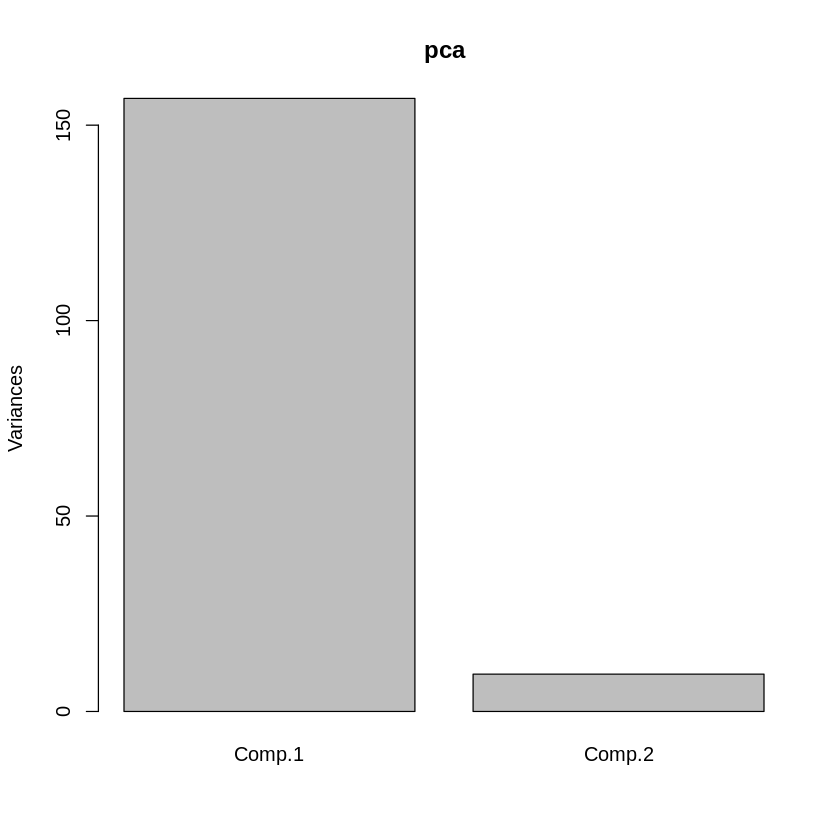

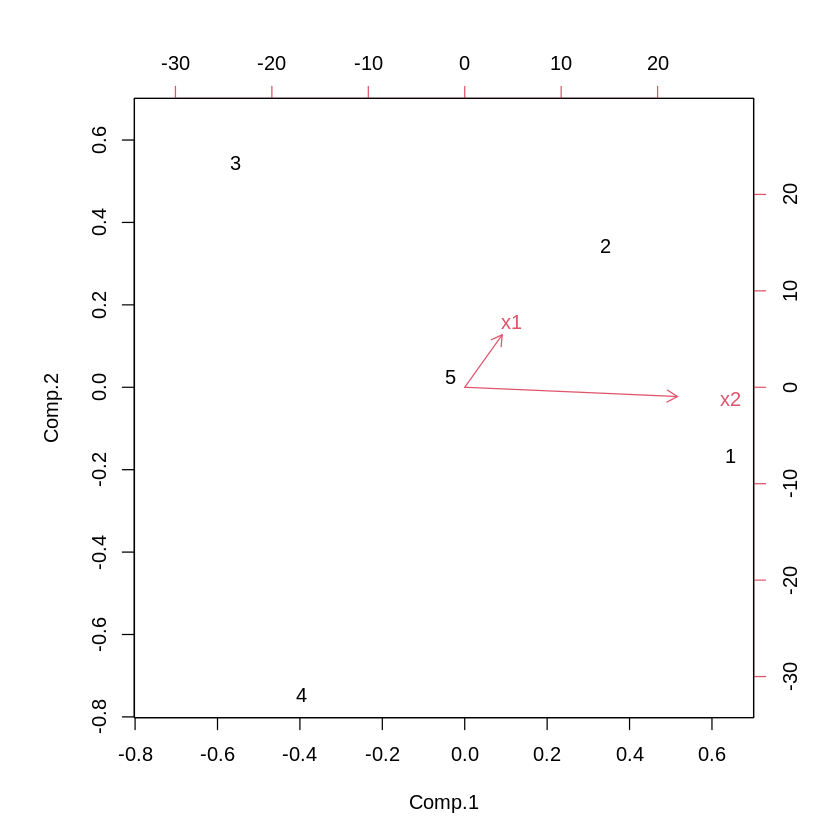

In [16]:
screeplot(pca)
biplot(pca)

Tutorial de 12 min: https://www.youtube.com/watch?v=CHwXquIukw8

# Script do Professor

In [17]:
# Laboratório Componentes Principais

# Banco de dados Iris 

# Obter informações sobre o conjunto de dados iris

data(iris)
?iris

# Apresentar as seis primeiras linhas do conjunto de dados
head(iris)

# Verificar dimensão do conjunto de dados
dim(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


[1] 150   5

Standard deviations (1, .., p=4):
[1] 1.7083611 0.9560494 0.3830886 0.1439265

Rotation (n x k) = (4 x 4):
                    PC1         PC2        PC3        PC4
Sepal.Length  0.5210659 -0.37741762  0.7195664  0.2612863
Sepal.Width  -0.2693474 -0.92329566 -0.2443818 -0.1235096
Petal.Length  0.5804131 -0.02449161 -0.1421264 -0.8014492
Petal.Width   0.5648565 -0.06694199 -0.6342727  0.5235971

Standard deviations (1, .., p=4):
[1] 1.7083611 0.9560494 0.3830886 0.1439265

Rotation (n x k) = (4 x 4):
                    PC1         PC2        PC3        PC4
Sepal.Length  0.5210659 -0.37741762  0.7195664  0.2612863
Sepal.Width  -0.2693474 -0.92329566 -0.2443818 -0.1235096
Petal.Length  0.5804131 -0.02449161 -0.1421264 -0.8014492
Petal.Width   0.5648565 -0.06694199 -0.6342727  0.5235971

Standard deviations (1, .., p=4):
[1] 2.0562689 0.4926162 0.2796596 0.1543862

Rotation (n x k) = (4 x 4):
                     PC1         PC2         PC3        PC4
Sepal.Length  0.36138659 -0.65658877  0.58202985  0.3154872
Sepal.Width  -0.08452251 -0.73016143 -0.59791083 -0.3197231
Petal.Length  0.85667061  0.17337266 -0.07623608 -0.4798390
Petal.Width   0.35828920  0.07548102 -0.54583143  0.7536574

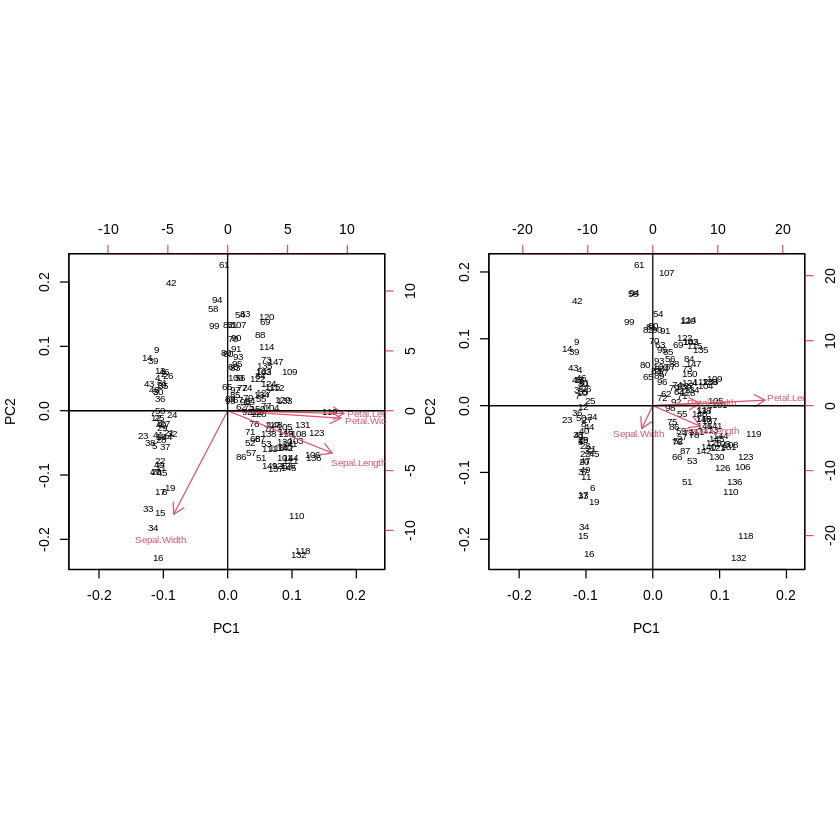

In [18]:
# Componentes principais

pca <- prcomp(iris[,-5], center=TRUE, scale=TRUE)
pca

# Valores dos Componentes Principais (Variáveis Latentes)

###Sofre efeito da escala de variávies

pca1 <- prcomp(iris[,-5], center=TRUE, scale=TRUE)
pca1

pca2 <- prcomp(iris[,-5], center=TRUE, scale=FALSE)
pca2

par(mfrow=c(1,2),cex=0.7)
biplot(pca1)
abline(a=0,b=0)
abline(h=0,v=0)
biplot(pca2)
abline(a=0,b=0)
abline(h=0,v=0)

In [19]:
# Outro pacote

install.packages("FactoMineR")
library(FactoMineR)

iris.pca <- PCA(iris[,-5])

install.packages("devtools")
library("devtools")
install_github("kassambara/factoextra", force=TRUE)
library("factoextra")

fviz_pca_ind(iris.pca,
             geom.ind = "point",
             col.ind = iris$Species,
              palette = c("yellow","black","red"),
addEllipses = TRUE,
legend.title="Grupos")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘textshaping’, ‘ragg’, ‘pkgdown’


Warning message in install.packages("devtools"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘pkgdown’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘devtools’ had non-zero exit status”
Loading required package: usethis





── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpXDvCuc/remotes5c123ccdd723/kassambara-factoextra-1689fc7/DESCRIPTION’ ... OK
* preparing ‘factoextra’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘factoextra_1.0.7.999.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


[1] 150   5

Importance of components:
                          Comp.1     Comp.2     Comp.3      Comp.4
Standard deviation     2.0494032 0.49097143 0.27872586 0.153870700
Proportion of Variance 0.9246187 0.05306648 0.01710261 0.005212184
Cumulative Proportion  0.9246187 0.97768521 0.99478782 1.000000000


Loadings:
             Comp.1 Comp.2 Comp.3 Comp.4
Sepal.Length  0.361  0.657  0.582  0.315
Sepal.Width          0.730 -0.598 -0.320
Petal.Length  0.857 -0.173        -0.480
Petal.Width   0.358        -0.546  0.754

               Comp.1 Comp.2 Comp.3 Comp.4
SS loadings      1.00   1.00   1.00   1.00
Proportion Var   0.25   0.25   0.25   0.25
Cumulative Var   0.25   0.50   0.75   1.00

Comp.1,Comp.2,Comp.3,Comp.4
-2.684126,0.3193972,0.02791483,0.002262437
-2.714142,-0.1770012,0.21046427,0.099026550
-2.888991,-0.1449494,-0.01790026,0.019968390
-2.745343,-0.3182990,-0.03155937,-0.075575817
-2.728717,0.3267545,-0.09007924,-0.061258593
-2.280860,0.7413304,-0.16867766,-0.024200858


Importance of components:
                          Comp.1    Comp.2     Comp.3      Comp.4
Standard deviation     1.7083611 0.9560494 0.38308860 0.143926497
Proportion of Variance 0.7296245 0.2285076 0.03668922 0.005178709
Cumulative Proportion  0.7296245 0.9581321 0.99482129 1.000000000

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
   0.6856935    0.1899794    3.1162779    0.5810063

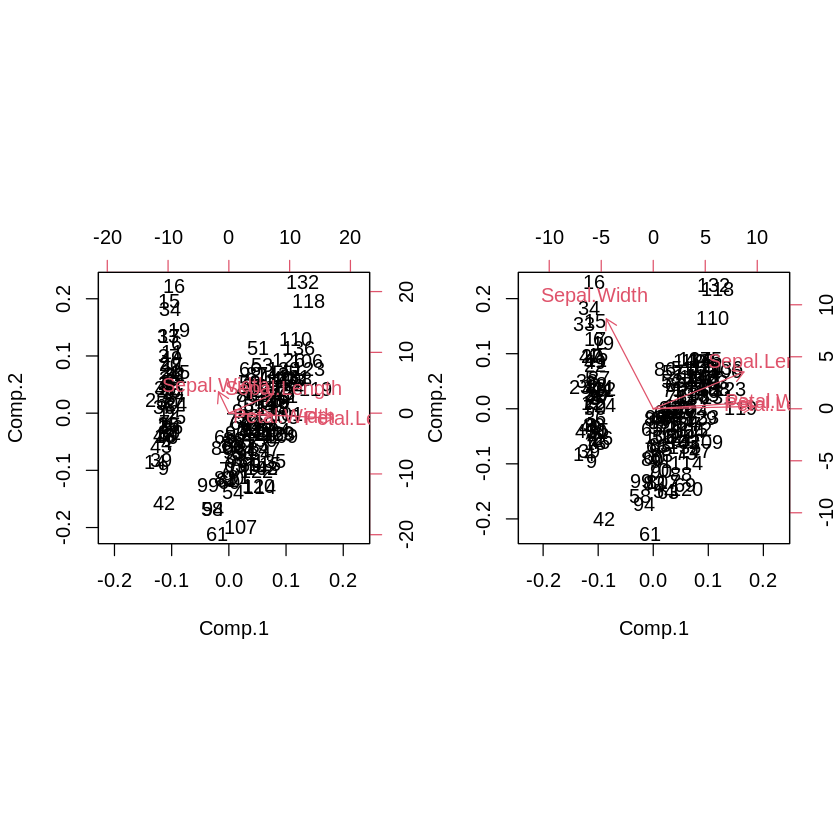

In [20]:
###

data(iris)
?iris

#Apresentar as seis primeiras linhas do conjunto de dados
head(iris)

#Verificar dimensão do conjunto de dados
dim(iris)

pca_Cov <- princomp(iris[,-5], cor = FALSE, scores = TRUE)
summary(pca_Cov)

#Pesos
pca_Cov$loadings

#score
head(pca_Cov$scores)

par(mfrow=c(1,2))
biplot(pca_Cov)

##PCA _ COR
pca_Cor <- princomp(iris[,-5], cor = TRUE, scores = TRUE)
summary(pca_Cor)

biplot(pca_Cor)

variancias <- apply(iris[,-5],2, var)
variancias